# <center>Mean Energy</center>

Mean energy, also referred to as expectation value of energy in statistical physics represents the average energy of the system over all its possible microstates accounting its probability. It is expressed as:

### <center>$\langle E\rangle = \langle \hat{H}\rangle = \sum_ip_i\langle i|\hat{H}|i\rangle = \sum_ip_i\epsilon_i$</center>

Where $p_i$ is a probability system $i$:

### <center>$p_i = \frac{e^{-\beta\epsilon_i}}{Z} = \frac{e^{-\beta\epsilon_i}}{\sum_i e^{-\beta\epsilon_i}}$</center>

$Z$ is a partition function (a sum over all passible states):

### <center>$Z = Tr(e^{-\beta\hat{H}}) = \sum_i e^{-\beta\epsilon_i}$</center>

And:
<ul>
    <li>$\beta = \frac{1}{T}$ is a Boltzmann's factor and $T$ is a temperature</li>
    <li>$\epsilon_i$ is an energy level</li>
</ul>

Let's implement it in a code:

In [1]:
import sys
sys.path.append('..')
from HamiltonianClass import Hamiltonian, QuantumState

First, we calculate the partition function (we assume $T = 0.5$):

In [4]:
L = 4
J = 1
delta = 1

hamiltonian = Hamiltonian(L, J, delta, is_pbc=False)
hamiltonian.truncate_basis_to_spin_zero()
hamiltonian.heisenberg_hamiltonian()
hamiltonian.eigenstates()
hamiltonian.print_matrix()
hamiltonian.print_eigenstates(only_eigenvalues=True)

Matrix size: 6 x 6
Basis reduced to spin zero:
     0011     0101     0110     1001     1010     1100     

   0.2500   0.5000        0        0        0        0
   0.5000  -0.7500   0.5000   0.5000        0        0
        0   0.5000  -0.2500        0   0.5000        0
        0   0.5000        0  -0.2500   0.5000        0
        0        0   0.5000   0.5000  -0.7500   0.5000
        0        0        0        0   0.5000   0.2500
Eigenvalues:
  -1.6160
  -0.9571
  -0.2500
   0.1160
   0.4571
   0.7500


In [5]:
t = 0.5
ensemble = round(hamiltonian.calculate_ensemble(t), 2)
print(f'Ensemble for T={t} equals {ensemble}')

Ensemble for T=0.5 equals 35.18


In [6]:
mean_energy = round(hamiltonian.calculate_mean_energy_power(t, 1), 2)
print(f'Mean energy equals: {mean_energy}')

Mean energy equals: -1.35


In [10]:
import ipywidgets

def calculate_mean_energy(L=10, J=1, delta=1, T=0.5):
    if J != 0:
        quantum_state = QuantumState(L, J, delta)
        mean_energy = round(quantum_state.calculate_mean_energy_power(T, 1), 5)
        print(f'Mean energy eguals: {mean_energy}')
    else:
        print('[ERROR] J has to be non-zero')

In [13]:
ipywidgets.interact(calculate_mean_energy, 
                    L=[i for i in range(2, 11, 2)],
                    J=(-3, 3, 0.2),
                    delta=(0, 2, 0.2),
                    T=(0.1, 2, 0.1))

interactive(children=(Dropdown(description='L', index=4, options=(2, 4, 6, 8, 10), value=10), FloatSlider(valu…

<function __main__.calculate_mean_energy(L=10, J=1, delta=1, T=0.5)>

Let's construct a graph for larger range of temperatures:

In [14]:
import numpy as np
from matplotlib import pyplot as plt
temperature_range = np.linspace(0.01, 2.5, 200)

In [27]:
def plot_mean_energy(L=10, J=1, delta=1):
    if J != 0:
        quantum_state = QuantumState(L, J, delta, is_reduced=True)
        quantum_state.calculate_mean_energy_range(temperature_range)
    
        figure, axes = plt.subplots(1, 1, layout='constrained')
        axes.plot(temperature_range, quantum_state.mean_energy, color='black')
        axes.grid()
        axes.set(xlabel='T', ylabel=r'$\langle E\rangle$', ylim=[-5, 0],
                 title='Mean energy in function of temperature')
    
        plt.show()

In [28]:
ipywidgets.interact(plot_mean_energy,
                    L=[i for i in range(2, 11, 2)],
                    J=(-3, 3, 0.2),
                    delta=(0, 2, 0.2))

interactive(children=(Dropdown(description='L', index=4, options=(2, 4, 6, 8, 10), value=10), FloatSlider(valu…

<function __main__.plot_mean_energy(L=10, J=1, delta=1)>

And last but not least the example for various chain sizes:

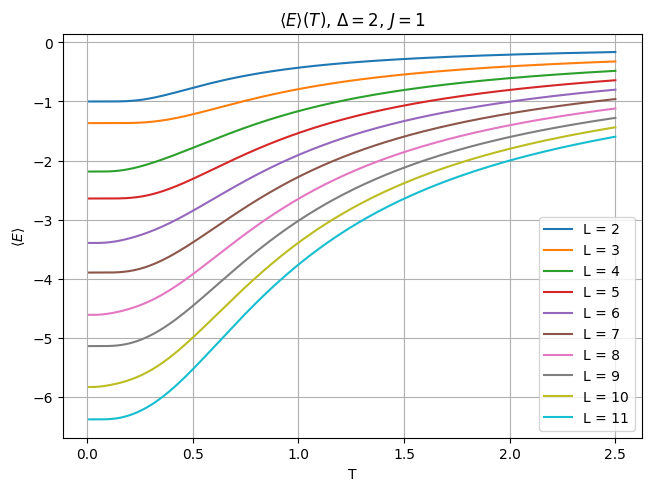

In [30]:
figure, axes = plt.subplots(1, 1, layout='constrained')
J, delta = 1, 2
for L in range(2, 12):
    quantum_state = QuantumState(L, J, delta)
    quantum_state.calculate_mean_energy_range(temperature_range)
    axes.plot(temperature_range, quantum_state.mean_energy, label=f'L = {L}')
    
axes.set_title(r'$\langle E\rangle(T)$\n' + f'$\Delta = {delta}$, $J = {J}$')
axes.legend(loc='lower right')
axes.grid()
axes.set(xlabel='T', ylabel=r'$\langle E\rangle$')

plt.show()